In [281]:
import os
from binance.client import Client
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn


In [177]:
api_key = USE YOUR KEY HERE
api_secret = USE YOUR KEY HERE
client = Client(api_key, api_secret)

In [261]:
def get_ticker_price(ticker_symbol: str, days:int ):
    """
    Get ticker price of a specific coin
    """

    target_date = (datetime.now() -timedelta(days = days)).strftime("%d %b %Y %H:%M:%S")
    key = f"{ticker_symbol}"
    end_date = datetime.now() 
    end_date = end_date.strftime("%d %b %Y %H:%M:%S")
    
    coindata = pd.DataFrame(columns = [key])
    
    prices = []
    dates = []
    for result in client.get_historical_klines(
        ticker_symbol, "1m", target_date, end_date, limit=1000
        ):
        date = datetime.utcfromtimestamp(result[0] / 1000).strftime("%d %b %Y %H:%M:%S")
        price = float(result[1])
        dates.append(date)
        prices.append(price)

    coindata[key] = prices
    coindata['date'] = dates




    return(coindata.reindex(columns =['date',key]))

In [314]:
# Grab coin prices from binance server 
# Add your own obviously


coinIDs = ['ADA' ,
           'ATOM', 
           'BAT', 
           'BTT', 
           'DASH', 
           'EOS',
           'ETC', 
           'ICX',
           'IOTA', 
           'NEO', 
           'OMG', 
           'ONT', 
           'QTUM',
           'TRX', 
           'VET', 
           'XLM', 
           'XMR']

cointickers = [coin+'USDT' for coin in coinIDs]

### Set Period here, this is the number of days of data you want to download for each coin ###
num_days = 3
###

#Create initial df with first coin then fill with all from list

coindata = get_ticker_price(cointickers[0],num_days)
for tick in cointickers[1:]:
    newdata = get_ticker_price(tick,num_days)
    coindata = pd.merge(coindata, newdata)



<AxesSubplot:xlabel='date'>

<Figure size 1440x576 with 0 Axes>

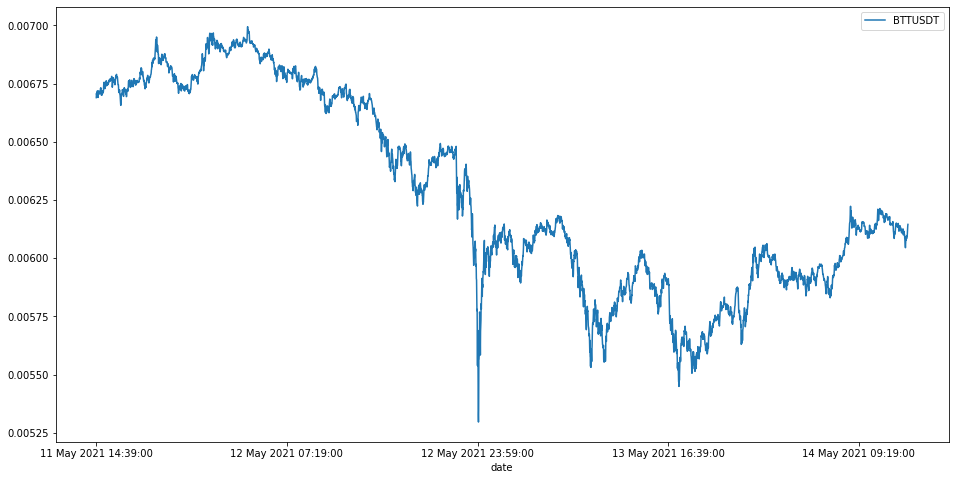

In [378]:
## Sanity checker, Are we getting the data? Let's plot it

def plotmovement(x1, y1,ticker):
    '''
    plots the noise of two coins 
    '''
    fig = plt.figure(figsize=(20,8))
    plt.plot( x1, y1,label=ticker)
    plt.legend()

## Too much data so lets just plot a subset.
    
start = 0
end = 200

fig = plt.figure(figsize=(20,8))
coindata.plot('date','BTTUSDT',figsize = (16,8),)

In [280]:
# print correlation table

coindata.corr()

,ADAUSDT,ATOMUSDT,BATUSDT,BTTUSDT,DASHUSDT,EOSUSDT,ETCUSDT,ICXUSDT,IOTAUSDT,NEOUSDT,OMGUSDT,ONTUSDT,QTUMUSDT,TRXUSDT,VETUSDT,XLMUSDT,XMRUSDT
ADAUSDT,1.000000,-0.185697,-0.103038,-0.107386,-0.165804,-0.173501,-0.222665,-0.050893,0.365320,-0.117857,-0.161517,-0.192423,-0.085342,-0.150160,-0.050903,-0.147263,-0.057612
ATOMUSDT,-0.185697,1.000000,0.948249,0.936466,0.923843,0.926244,0.847471,0.809662,0.615208,0.936622,0.934240,0.952321,0.883513,0.939638,0.907985,0.689853,0.913321
BATUSDT,-0.103038,0.948249,1.000000,0.942754,0.923037,0.936026,0.797026,0.852364,0.726744,0.932599,0.922268,0.950127,0.902941,0.924988,0.922019,0.616992,0.930483
BTTUSDT,-0.107386,0.936466,0.942754,1.000000,0.913616,0.974608,0.890091,0.798678,0.677926,0.987495,0.967962,0.975124,0.968919,0.979345,0.984779,0.712120,0.973550
DASHUSDT,-0.165804,0.923843,0.923037,0.913616,1.000000,0.905033,0.898000,0.917969,0.571423,0.923820,0.949234,0.949155,0.895135,0.905575,0.882955,0.489890,0.884549
EOSUSDT,-0.173501,0.926244,0.936026,0.974608,0.905033,1.000000,0.863656,0.772449,0.643041,0.972574,0.954068,0.975474,0.969592,0.948527,0.962449,0.727398,0.952527
ETCUSDT,-0.222665,0.847471,0.797026,0.890091,0.898000,0.863656,1.000000,0.761465,0.410633,0.921111,0.930204,0.890175,0.904742,0.893879,0.861889,0.559890,0.850648
ICXUSDT,-0.050893,0.809662,0.852364,0.798678,0.917969,0.772449,0.761465,1.000000,0.623222,0.807234,0.850075,0.834580,0.763993,0.786480,0.780069,0.276168,0.764177
IOTAUSDT,0.365320,0.615208,0.726744,0.677926,0.571423,0.643041,0.410633,0.623222,1.000000,0.659958,0.617035,0.640993,0.648162,0.629165,0.725839,0.376916,0.719973
NEOUSDT,-0.117857,0.936622,0.932599,0.987495,0.923820,0.972574,0.921111,0.807234,0.659958,1.000000,0.978320,0.977852,0.979841,0.969349,0.977123,0.699437,0.968470


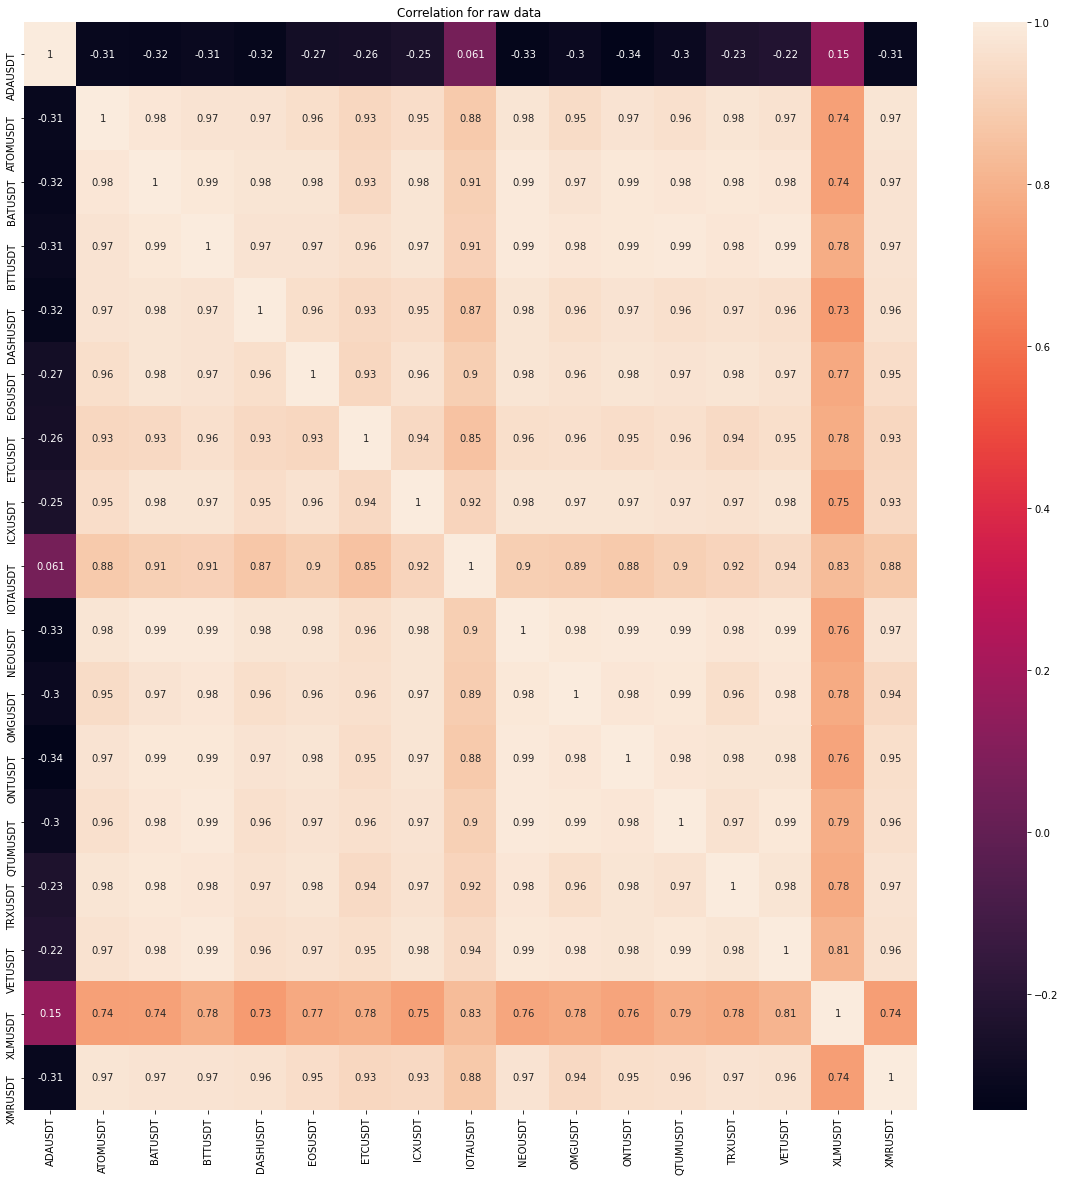

In [318]:
## Correlation matrix for raw data. 

corrMatrix = coindata.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for raw data ')
plt.show()

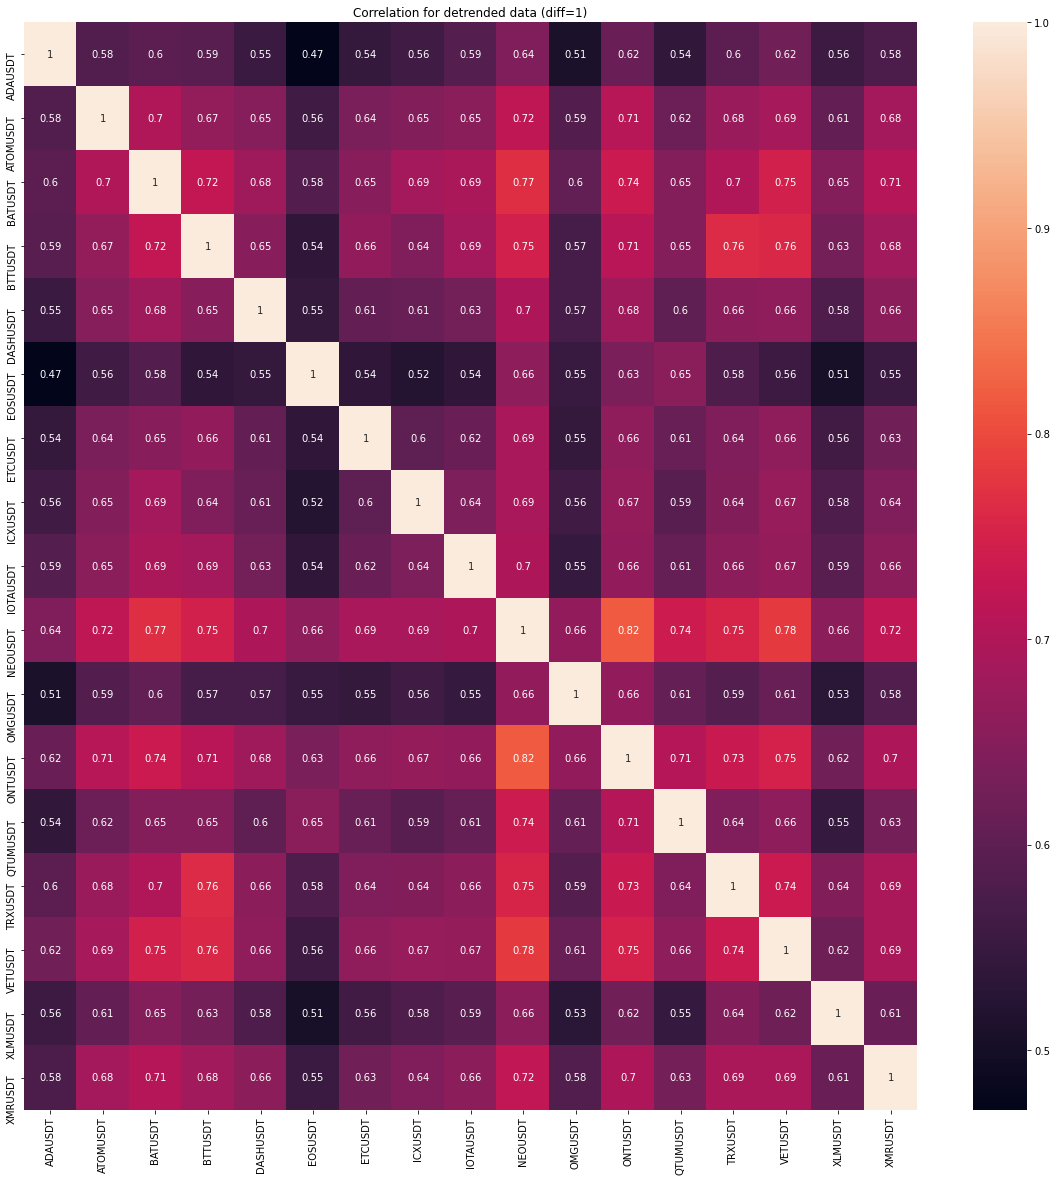

In [316]:
### Detrend the data using first difference 
### more info at https://youtu.be/nPYPyh20gGo

detrendeddata = pd.DataFrame()

for column in coindata:
    if column != 'date':
        detrendeddata[column] = coindata[column].diff(1)
        
corrMatrix = detrendeddata.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()

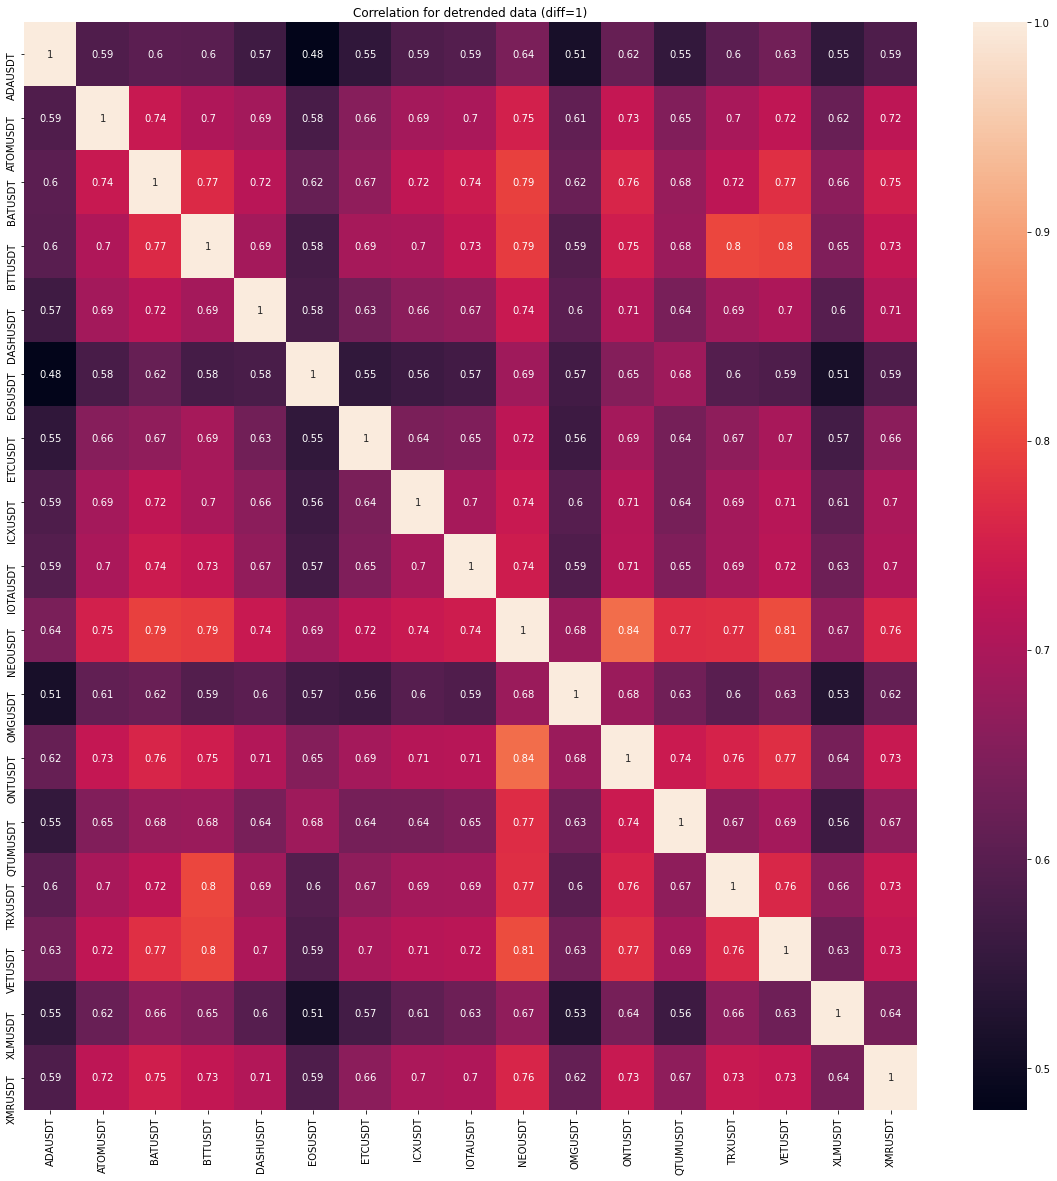

In [327]:
### Detrend the data using rolling average
radf = pd.DataFrame()

for column in coindata:
    if column != 'date':
        radf[column] = coindata[column]-coindata[column].rolling(window=3).mean()
        
corrMatrix = radf.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()

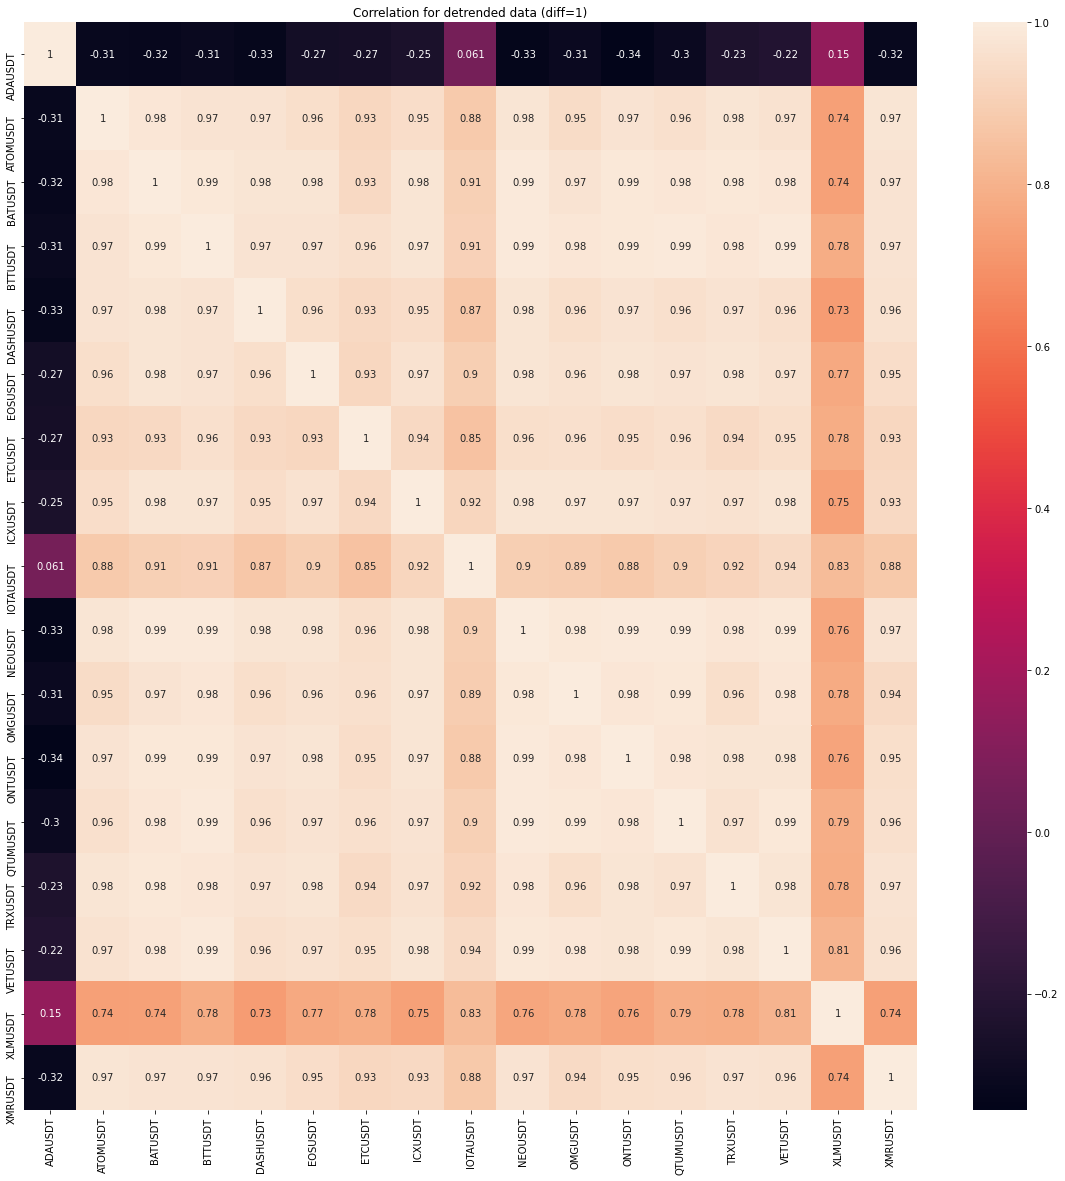

In [328]:
### Examine the trend of the rolling average

radf2 = pd.DataFrame()

for column in coindata:
    if column != 'date':
        radf2[column] = coindata[column].rolling(window=3).mean()

corrMatrix = radf2.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()